In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit
import numba as nb
from scipy.interpolate import interp1d
import scipy

In [2]:
A_mean = np.load('A_mean_111.npy')
diversity_record_1d = np.load('diversity_record_1d_111.npy')
fluc_record_1d = np.load('fluc_record_1d_111.npy')
div_mean_1d = np.load('div_mean_111.npy')
fluc_mean_1d = np.load('fluc_mean_111.npy')
print(np.shape(diversity_record_1d))
ystep = 20  # A_mean 的步数
num_sim = 1000  # A_mean 的步数

(20, 1000)


In [3]:
print(A_mean)
print(div_mean_1d)

[0.01       0.06210526 0.11421053 0.16631579 0.21842105 0.27052632
 0.32263158 0.37473684 0.42684211 0.47894737 0.53105263 0.58315789
 0.63526316 0.68736842 0.73947368 0.79157895 0.84368421 0.89578947
 0.94789474 1.        ]
[1.      0.99998 0.99058 0.91828 0.79078 0.66034 0.55146 0.45812 0.39926
 0.34784 0.31176 0.27558 0.24806 0.22914 0.21046 0.18992 0.17794 0.1626
 0.15454 0.14598]


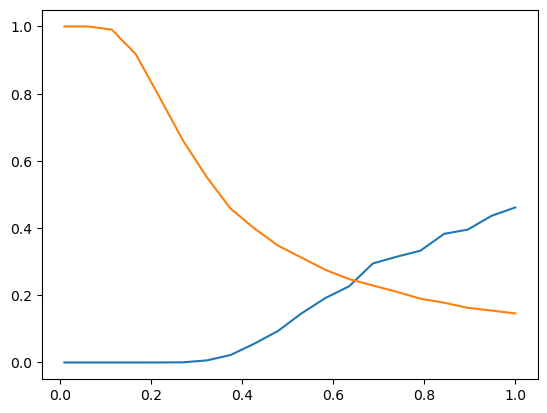

In [4]:
plt.plot(A_mean,fluc_mean_1d)
plt.plot(A_mean,div_mean_1d)

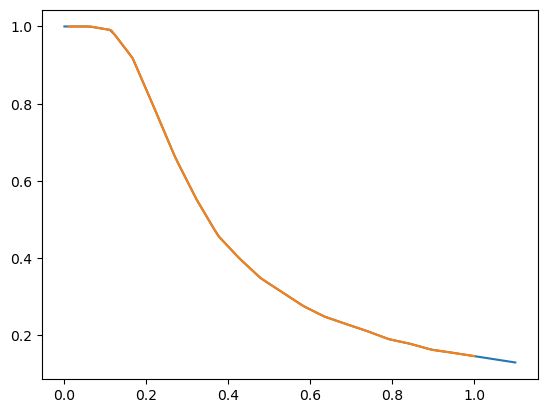

In [5]:
#对存活率函数做插值并检验
f1 = interp1d(A_mean, div_mean_1d, fill_value="extrapolate")
test_points= np.linspace(0,1.1,100)
#print(test_points)
pri = f1(test_points)
plt.plot(test_points, pri)
plt.plot(A_mean,div_mean_1d)

In [6]:
#计算均值并预测
AA_s = np.load('AA_record_111.npy')
print(np.shape(AA_s))
AA_mean = np.zeros((20,1000))
div_pri = np.zeros((20,1000))

AA_s = AA_s - np.eye(50)
for i in range(20):
    for j in range(1000):
        AA_mean[i,j] = np.mean(AA_s[i,j])
        div_pri[i,j] = f1(AA_mean[i,j])

print(np.max(AA_mean), np.min(AA_mean))

(20, 1000, 50, 50)
1.0184287488388315 0.009627541747449987


(20000,)
(20000,)
(20000,)


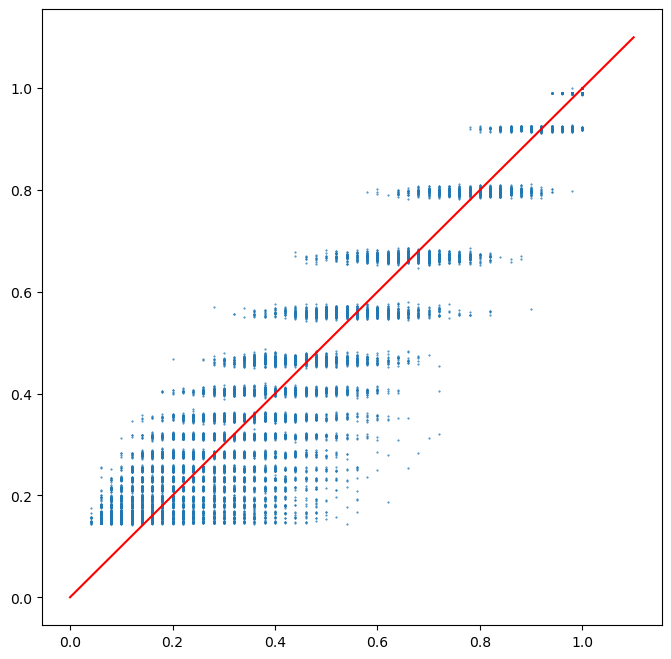

In [ ]:
#绘图
div_pri_f = div_pri.flatten()
diversity_record_1d_f = diversity_record_1d.flatten()
AA_mean_f = AA_mean.flatten()
print(np.shape(diversity_record_1d_f))
print(np.shape(div_pri_f))
print(np.shape(AA_mean_f))

plt.figure(figsize= (8,8))
plt.scatter(diversity_record_1d_f, div_pri_f, s= 0.2)
plt.plot(test_points, test_points, color = 'red')
#plt.scatter(div_pri_f, diversity_record_1d_f, s= 0.2)

0.06722776609516665
0.06623534093093009


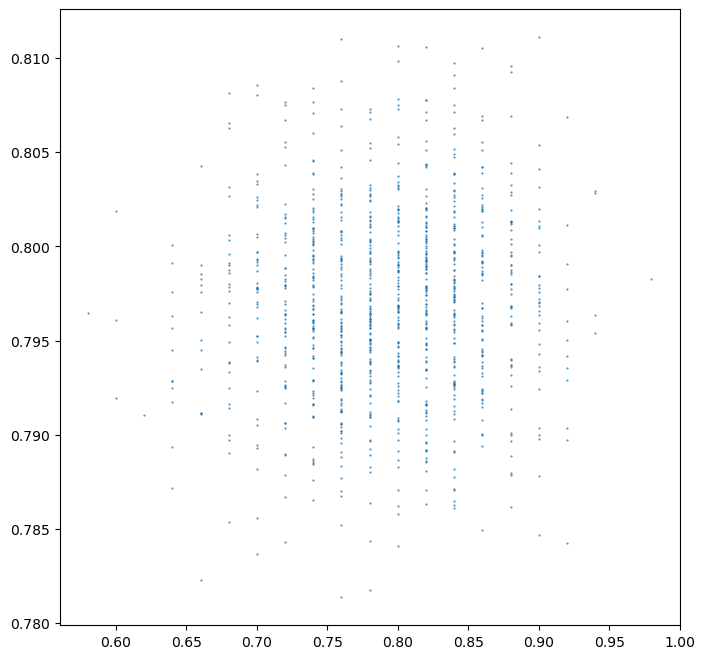

0.003947248165237812
0.05067292290346281


In [8]:
#计算相关系数和损失函数
start = 4000
end = 5000

plt.figure(figsize= (8,8))
plt.scatter(diversity_record_1d_f[start:end],div_pri_f[start:end],  s= 0.2)
print(scipy.stats.pearsonr(diversity_record_1d_f[start:end],div_pri_f[start:end])[0])
print(scipy.stats.spearmanr(diversity_record_1d_f[start:end],div_pri_f[start:end], )[0])
plt.show()
#计算MSE
mse = np.mean((diversity_record_1d_f[start:end] - div_pri_f[start:end]) ** 2)
mae = np.mean(np.abs(diversity_record_1d_f[start:end] - div_pri_f[start:end]))
print(mse) 
print(mae)

(array([  0.,   0.,   0.,   1.,  10.,  24.,  31., 128.,  81., 199.,  75.,
        155.,  49.,  60.,  65.,  23.,  53.,  13.,  21.,   3.,   4.,   2.,
          1.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.]),
 array([0.        , 0.02857143, 0.05714286, 0.08571429, 0.11428571,
        0.14285714, 0.17142857, 0.2       , 0.22857143, 0.25714286,
        0.28571429, 0.31428571, 0.34285714, 0.37142857, 0.4       ,
        0.42857143, 0.45714286, 0.48571429, 0.51428571, 0.54285714,
        0.57142857, 0.6       , 0.62857143, 0.65714286, 0.68571429,
        0.71428571, 0.74285714, 0.77142857, 0.8       , 0.82857143,
        0.85714286, 0.88571429, 0.91428571, 0.94285714, 0.97142857,
        1.        ]),
 <BarContainer object of 35 artists>)

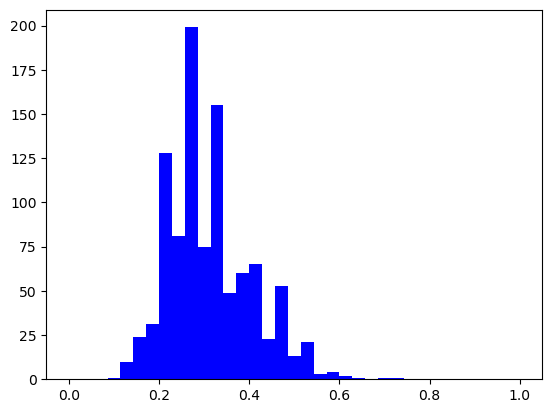

In [9]:
plt.hist(diversity_record_1d[10], bins=35, range=(0,1), alpha=1, color='b')

(array([536.,  31.,  20.,  25.,  19.,  23.,  33.,  38.,  40.,  38.,  36.,
         33.,  31.,  27.,  25.,  17.,  13.,  11.,   2.,   1.]),
 array([0.  , 0.06, 0.12, 0.18, 0.24, 0.3 , 0.36, 0.42, 0.48, 0.54, 0.6 ,
        0.66, 0.72, 0.78, 0.84, 0.9 , 0.96, 1.02, 1.08, 1.14, 1.2 ]),
 <BarContainer object of 20 artists>)

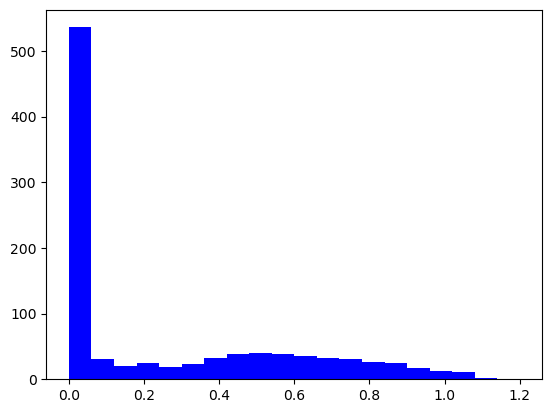

In [10]:
plt.hist(fluc_record_1d[16], bins=20, range=(0,1.2), alpha=1, color='b')

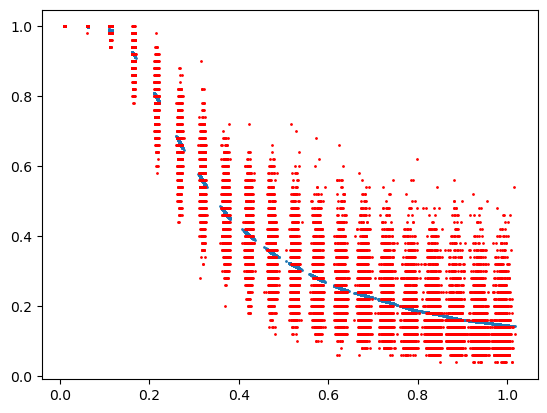

In [20]:
plt.scatter(AA_mean_f, div_pri_f,s=1)
plt.scatter(AA_mean_f, diversity_record_1d_f, s=1 ,color ='red')